In [1]:
%load_ext autoreload
%autoreload 2

import pymc3 as pm
import numpy as np
import math as m
import matplotlib.pyplot as plt
import dive 
import deerlab as dl
from scipy.io import loadmat

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


## Load and display data

In [2]:
loaded_data = np.genfromtxt("../../data/3992_good2.dat", skip_header = 1, delimiter = ',')
Pid = 3992
t = loaded_data[:,0]
Vexp = loaded_data[:,1]

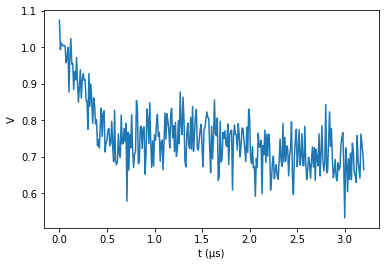

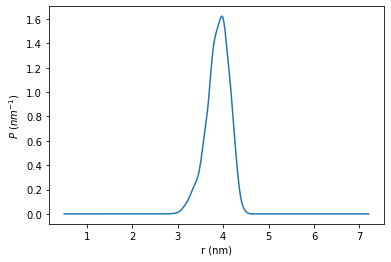

In [3]:
plt.plot(t, Vexp)
plt.xlabel('t (µs)')
plt.ylabel('V')
plt.show()

P0s = loadmat('..\..\data\edwards_testset\distributions_2LZM.mat')['P0']
rref = np.squeeze(loadmat('..\..\data\edwards_testset\distributions_2LZM.mat')['r0'])
Pref = P0s[Pid-1,:]

plt.plot(rref, Pref)
plt.xlabel('r (nm)')
plt.ylabel(r'$P~(nm^{-1})$')
plt.show()



## Regularization

In [4]:
pars = {"method": 'regularization', "r": np.linspace(2,6,200)}

model = dive.model(t, Vexp, pars)

MCMCparameters = {"draws": 5000,"tune": 2000, "chains": 4, 'cores': 4}
trace = dive.sample(model,MCMCparameters)

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>SamplePfromV: [P]
>randDelta: [delta]
>NUTS: [k, V0, lamb, sigma]


Sampling 4 chains for 2_000 tune and 5_000 draw iterations (8_000 + 20_000 draws total) took 2226 seconds.
WARNING (aesara.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
The acceptance probability does not match the target. It is 0.8815120187186265, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.8814202007237625, but should be close to 0.8. Try to increase the number of tuning steps.
The estimated number of effective samples is smaller than 200 for some parameters.


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
k,0.048,0.005,0.038,0.057,0.000,0.000,9359.0,8334.0,1.00
λ,0.224,0.015,0.196,0.253,0.000,0.000,5838.0,8751.0,1.00
V₀,0.957,0.016,0.927,0.988,0.000,0.000,5595.0,8900.0,1.00
σ,0.049,0.002,0.045,0.052,0.000,0.000,6857.0,11150.0,1.00
δ,102778.385,168936.229,2042.599,350212.711,15278.125,10829.142,87.0,216.0,1.03
lg(α),1.039,0.256,0.572,1.529,0.027,0.019,88.0,218.0,1.03


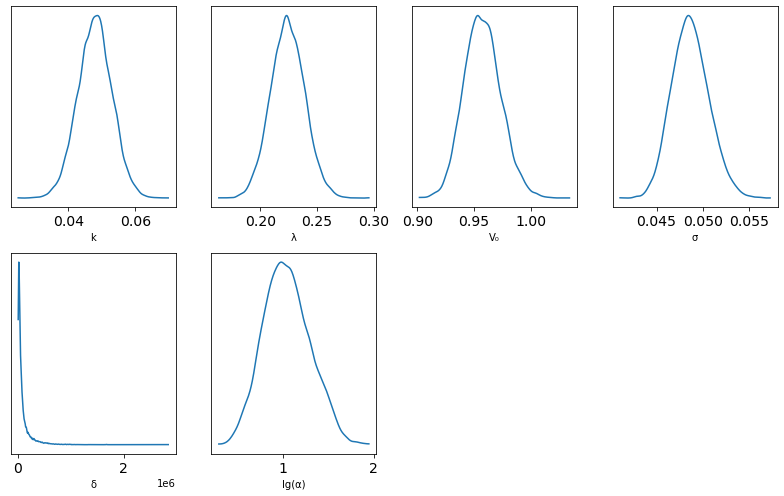

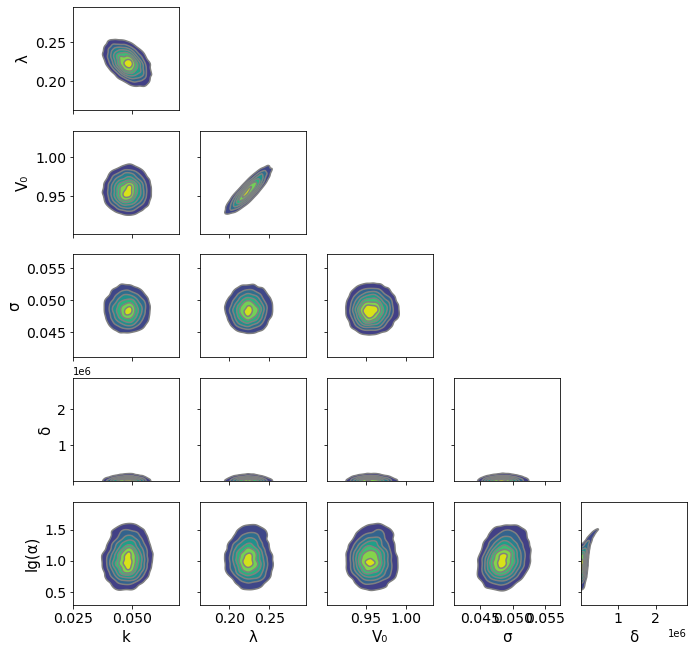

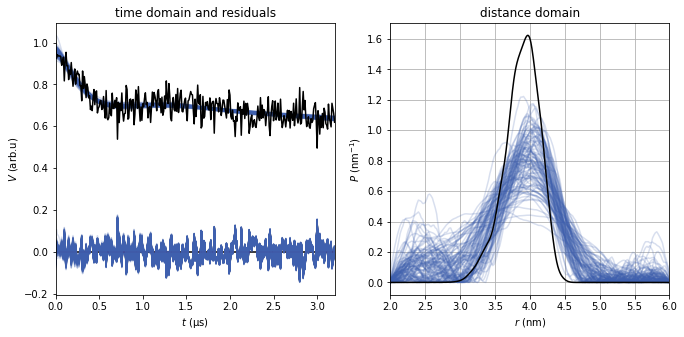

In [5]:
dive.summary(trace, model, Pid = Pid)  

## Single Gaussian

In [6]:
pars_gauss = {"method": 'gaussian', "r": np.linspace(2,6,200), 'nGauss': 1}

model_gauss = dive.model(t, Vexp, pars_gauss)

MCMCparameters = {"draws": 5000,"tune": 1000, "chains": 4, 'cores': 4}
trace_gauss = dive.sample(model_gauss,MCMCparameters)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, V0, lamb, k, w, r0_rel]


Sampling 4 chains for 1_000 tune and 5_000 draw iterations (4_000 + 20_000 draws total) took 277 seconds.


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
r0[0],4.005,0.064,3.887,4.128,0.001,0.000,13075.0,11646.0,1.0
w[0],0.602,0.158,0.309,0.897,0.001,0.001,13597.0,11963.0,1.0
k,0.052,0.005,0.042,0.060,0.000,0.000,14515.0,11594.0,1.0
λ,0.200,0.013,0.176,0.225,0.000,0.000,10472.0,12059.0,1.0
V₀,0.934,0.013,0.911,0.958,0.000,0.000,10367.0,10102.0,1.0
σ,0.048,0.002,0.044,0.052,0.000,0.000,17078.0,11998.0,1.0


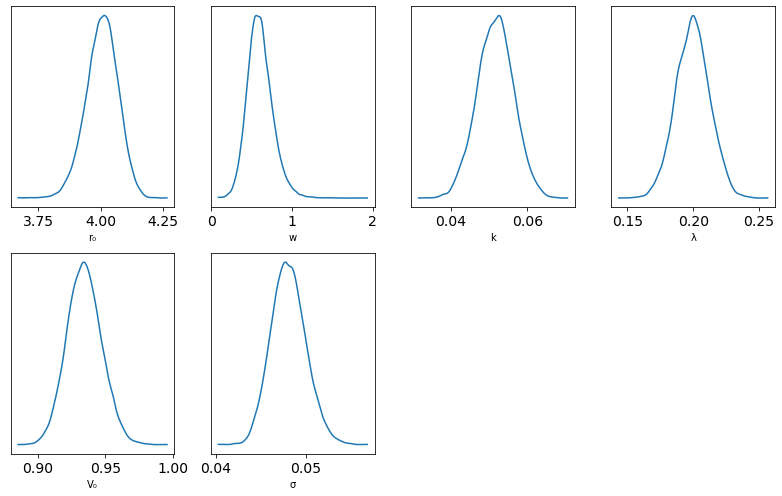

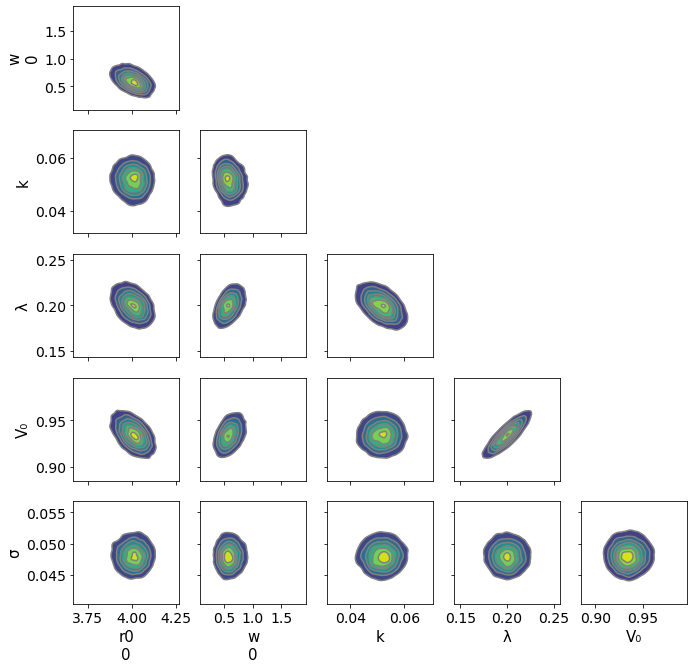

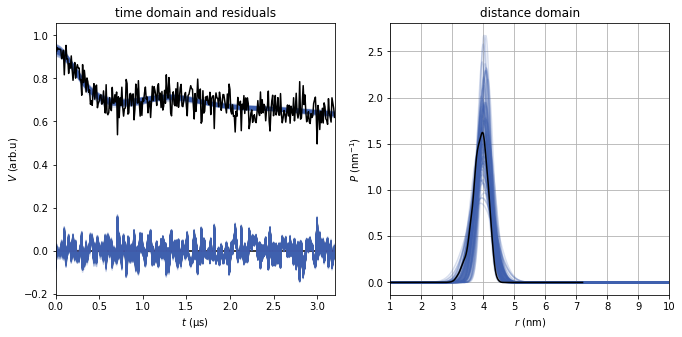

In [7]:
dive.summary(trace_gauss, model_gauss, Pid = Pid)  